## DATA PREPROCESSING


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Accidents_Dec20_Updated.csv', low_memory=False)

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42768 entries, 0 to 42767
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     42768 non-null  object 
 1   Severity               42768 non-null  int64  
 2   Start_Time             42768 non-null  object 
 3   End_Time               42768 non-null  object 
 4   Start_Lat              42768 non-null  float64
 5   Start_Lng              42767 non-null  float64
 6   End_Lat                38562 non-null  float64
 7   End_Lng                38562 non-null  float64
 8   Distance(mi)           42767 non-null  float64
 9   Description            42767 non-null  object 
 10  Number                 14888 non-null  float64
 11  Street                 42767 non-null  object 
 12  Side                   42767 non-null  object 
 13  City                   42763 non-null  object 
 14  County                 42767 non-null  object 
 15  St

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,42768.000000,42768.000000,42767.000000,38562.000000,38562.000000,42767.000000,14888.000000,41785.000000,25171.000000,41728.000000,41928.000000,41718.000000,38250.000000,23564.000000
mean,2.289632,36.495281,-96.397656,36.474763,-96.128667,0.395864,6686.169130,61.049345,55.007914,65.188363,29.658250,9.133120,7.855014,0.010956
std,0.555169,4.997337,17.744411,4.995932,17.633613,1.608695,14504.608766,18.413176,22.212886,22.866381,0.907478,2.818903,5.267950,0.139378
min,1.000000,24.574811,-124.486270,24.571389,-124.486270,0.000000,1.000000,-23.800000,-41.600000,2.000000,20.270000,0.000000,0.000000,0.000000
25%,2.000000,33.631295,-117.810017,33.603940,-117.658536,0.000000,933.000000,49.000000,39.000000,49.000000,29.590000,10.000000,4.600000,0.000000
50%,2.000000,36.069109,-91.192314,36.019261,-91.060528,0.000000,3016.000000,63.000000,58.000000,68.000000,29.920000,10.000000,7.000000,0.000000
75%,3.000000,40.316956,-80.843825,40.268014,-80.824167,0.288000,7990.250000,75.000000,72.000000,84.000000,30.070000,10.000000,10.400000,0.000000
max,4.000000,48.997581,-68.365955,48.997581,-68.365405,148.360001,851799.000000,117.000000,110.000000,100.000000,31.120000,80.000000,232.000000,9.990000


In [6]:
df.shape

(42768, 47)

### DATA CLEANING 

In [7]:
df.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    1
End_Lat                   4206
End_Lng                   4206
Distance(mi)                 1
Description                  1
Number                   27880
Street                       1
Side                         1
City                         5
County                       1
State                        1
Zipcode                     14
Country                      1
Timezone                    46
Airport_Code                93
Weather_Timestamp          682
Temperature(F)             983
Wind_Chill(F)            17597
Humidity(%)               1040
Pressure(in)               840
Visibility(mi)            1050
Wind_Direction             925
Wind_Speed(mph)           4518
Precipitation(in)        19204
Weather_Condition         1057
Amenity                      1
Bump                         1
Crossing

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

I decided to drop all the missing values since it is difficult to fill them without skewing the data

In [10]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS


In [16]:
Accidents_by_time_of_day = df['Sunrise_Sunset'].value_counts()
Accidents_by_time_of_day

Day      4793
Night    2868
Name: Sunrise_Sunset, dtype: int64

In [39]:
Accidents_by_time = df['Civil_Twilight'].value_counts()
Accidents_by_time

Day      5116
Night    2545
Name: Civil_Twilight, dtype: int64

In [40]:
Accidents_by_Nautical_Twilight = df['Nautical_Twilight'].value_counts()
Accidents_by_Nautical_Twilight

Day      5444
Night    2217
Name: Nautical_Twilight, dtype: int64

In [41]:
Accidents_by_Astronomical_Twighlight = df['Astronomical_Twilight'].value_counts()
Accidents_by_Astronomical_Twighlight

Day      5716
Night    1945
Name: Astronomical_Twilight, dtype: int64

According to the above code cells most of the accidents recorded happened during the day whether it was near dawn or during the wee hours of the day 

In [17]:
Accidents_near_station = df['Station'].value_counts()
Accidents_near_station

False    7360
True      301
Name: Station, dtype: int64

The few accidents recorded werelikely due to ignorance, lack of knowledge or maybe due to weather conditions making visibility a bit difficult

In [18]:
Accidents_near_railway = df['Railway'].value_counts()
Accidents_near_railway

False    7556
True      105
Name: Railway, dtype: int64

The few accidents recorded may be due to ignorance, new drivers and pedestrians or not knowing the departure and arrival times of the trains at the station

In [19]:
Accidents_near_junction = df['Junction'].value_counts()
Accidents_near_junction

False    7619
True       42
Name: Junction, dtype: int64

There weren't many accidents recorded near junctions likely due to drivers having knowldege of the layout of the road.

In [20]:
Accidents_near_stop_sign = df['Stop'].value_counts()
Accidents_near_stop_sign

False    7425
True      236
Name: Stop, dtype: int64

There weren;t many accidents recorded near a stop sign likely due to visibility, drivers being obserant and knowing the layout of roads

In [22]:
Accidents_near_bumps = df['Bump'].value_counts()
Accidents_near_bumps

False    7659
True        2
Name: Bump, dtype: int64

Bumps help reduce the speed at which a driver is travelling at so that is why there weren't many accidents recorded near bumps


In [23]:
Accidents_near_no_exit = df['No_Exit'].value_counts()
Accidents_near_no_exit

False    7639
True       22
Name: No_Exit, dtype: int64

Most drivers are usually aware of the layout of roads that is why it is difficult for them to cause accidents or for accidents to happen where there are not any exits

In [24]:
Accidents_near_roundabout = df['Roundabout'].value_counts()
Accidents_near_roundabout

False    7661
Name: Roundabout, dtype: int64

There weren't any accidents recorded at round abouts Likely due to speed limits and resence of traffic control police

In [25]:
Accidents_near_amenity = df['Amenity'].value_counts()
Accidents_near_amenity

False    7497
True      164
Name: Amenity, dtype: int64

There weren't many accidents recorded near ammenities likely because they can easily be seen and most amenities are not usually around major roads

In [26]:
Accidents_near_traffic = df['Traffic_Signal'].value_counts()
Accidents_near_traffic

False    5891
True     1770
Name: Traffic_Signal, dtype: int64

There were quite a number of accidents recorded likely because of drivers or pedestrians not being aware of the traffic signals 

In [27]:
Accidents_near_traffic_calming = df['Traffic_Calming'].value_counts()
Accidents_near_traffic_calming

False    7656
True        5
Name: Traffic_Calming, dtype: int64

There weren't many accidents recorded near a traffic calming maybe a cutrb, stop signs and road signs in general showing that drivers are observant

In [28]:
Accidents_near_crossing = df['Crossing'].value_counts()
Accidents_near_crossing

False    6654
True     1007
Name: Crossing, dtype: int64

There were quite a few accidents recorded at pedestrian crossings likely due to ignorance of the pedestrians or drivers

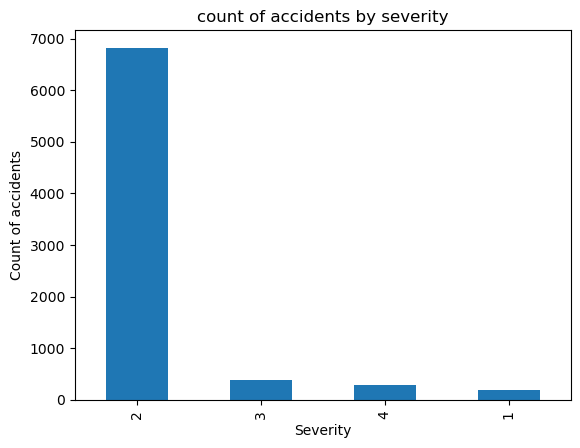

In [30]:
# Getting the total count of the accidents
Severity = df['Severity'].value_counts()

#plotting the bar chart
Severity.plot(kind = 'bar')

#labelling the plot
plt.xlabel('Severity')
plt.title('count of accidents by severity')
plt.ylabel('Count of accidents')

# showing the plot
plt.show()

The least amount of accidents recorder was those with a severity of 1 which indicates that there weren;t any major injuries or damage to property while the most amount of accidents recorded were those with  severity of 2 indicatig that there were some minor injuries recorded and some damage to property.

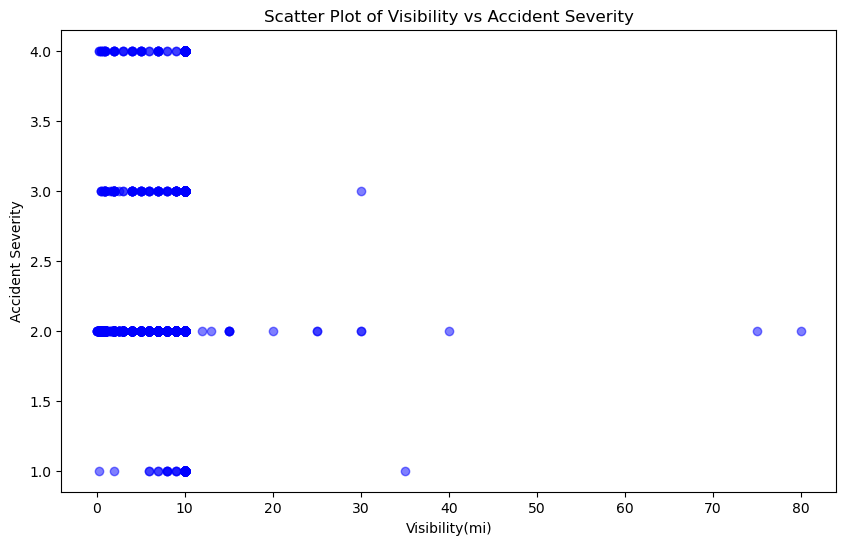

In [34]:
# Scatter plot of Temperature vs. Severity
plt.figure(figsize=(10, 6))
plt.scatter(df['Visibility(mi)'], df['Severity'], alpha=0.5, c='blue')
# Adding title and labels
plt.title('Scatter Plot of Visibility vs Accident Severity')
plt.xlabel('Visibility(mi)')
plt.ylabel('Accident Severity')

# Show the plot
plt.show()

The plot above shows that visibility was a major factor to when it comes to accidents. Lower visibility caused the majority of acccidets

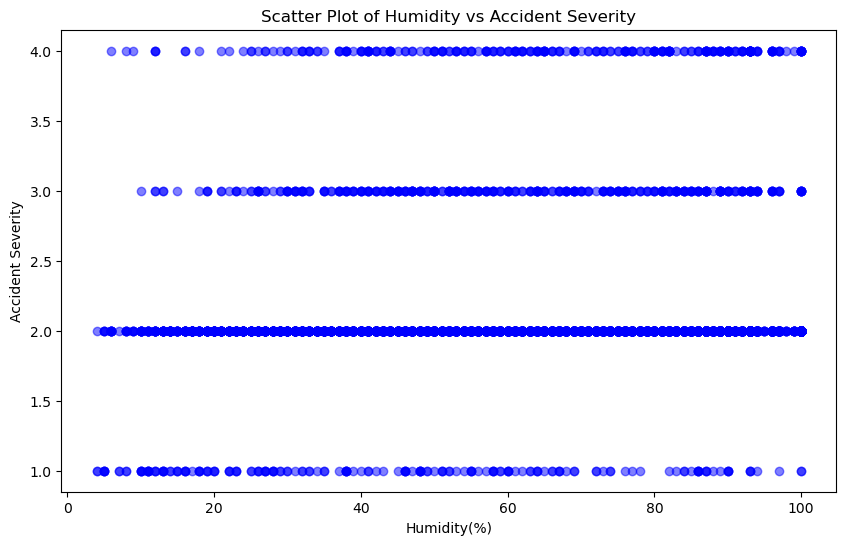

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Humidity(%)'], df['Severity'], alpha=0.5, c='blue')
# Adding title and labels
plt.title('Scatter Plot of Humidity vs Accident Severity')
plt.xlabel('Humidity(%)')
plt.ylabel('Accident Severity')

# Show the plot
plt.show()

Humid conditions do not seem to be a major cause for accidents however, the count of accidents increased with increasing humidity. Small accidents with a severity of 2 seem to be distributed across any humid conditions

In [36]:
df['Weather_Condition'].value_counts()

Fair                       3552
Cloudy                     1272
Mostly Cloudy              1026
Partly Cloudy               678
Light Rain                  343
Light Snow                  137
Fog                         131
Rain                         66
Haze                         64
Overcast                     47
Fair / Windy                 39
Cloudy / Windy               34
Heavy Rain                   30
Partly Cloudy / Windy        26
Mostly Cloudy / Windy        24
Light Drizzle                24
Smoke                        20
Thunder in the Vicinity      18
Light Rain / Windy           18
Light Rain with Thunder      16
Snow                         12
Thunder                       9
Heavy T-Storm                 9
Wintry Mix                    9
Shallow Fog                   7
Heavy Snow                    7
T-Storm                       7
Light Snow / Windy            6
Patches of Fog                4
Haze / Windy                  4
Rain / Windy                  3
Drizzle 

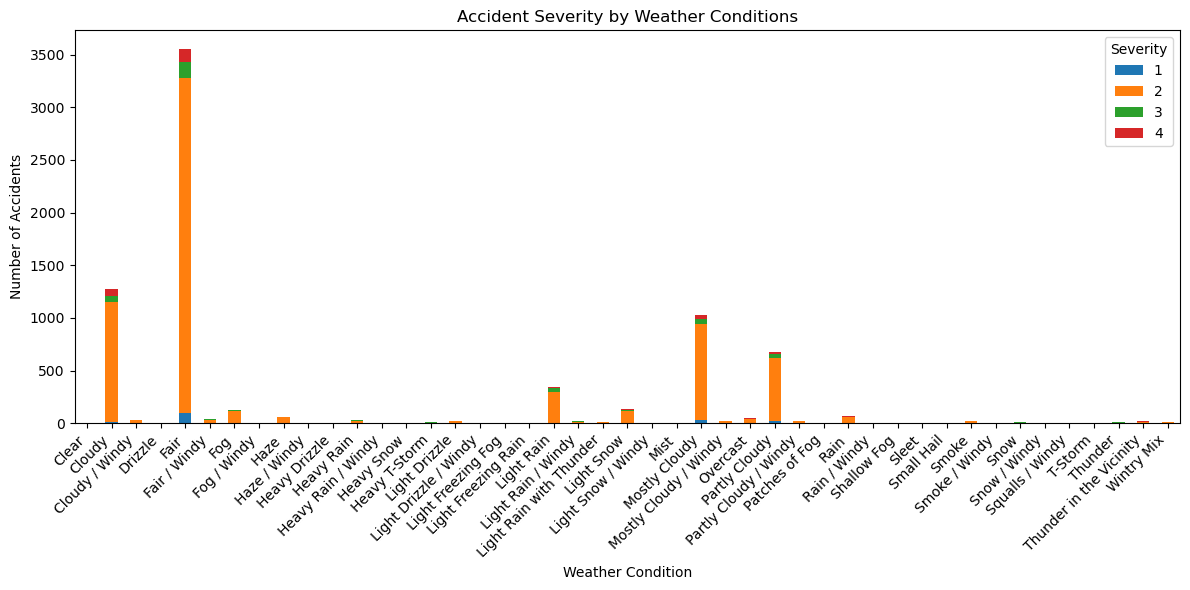

In [37]:
# Group by Severity and Weather_Condition and count the occurrences
grouped_data = df.groupby(['Severity', 'Weather_Condition']).size().reset_index(name='Counts')

# Pivot the data for better plotting
pivot_table = grouped_data.pivot(index='Weather_Condition', columns='Severity', values='Counts')

# Plot the data using a bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding labels and title
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

According to the above plot most of the accidents recorded happened during fair weather, cloudy weather, light rain, mostly cloudy, rai, partly cloudy, light snow, fog. All of these conditions affect visibility which may explain why there were so many accidents with those weather conditions.

In [44]:
df['City'].value_counts()

Miami           271
Charlotte       210
Houston         165
Orlando         132
Austin          126
               ... 
Churchville       1
Arvada            1
Cool              1
Sevierville       1
Killingworth      1
Name: City, Length: 2072, dtype: int64

In [45]:
df['County'].value_counts()

Miami-Dade     369
Los Angeles    324
Mecklenburg    217
Orange         198
Montgomery     180
              ... 
Daggett          1
Weld             1
Boundary         1
Chambers         1
Klickitat        1
Name: County, Length: 630, dtype: int64

In [46]:
# Group by State and count the number of accidents
accidents_per_state = df.groupby('State').size().reset_index(name='Accident_Count')

# Display the results
print(accidents_per_state)

   State  Accident_Count
0     AL              90
1     AR              17
2     AZ             224
3     CA            1321
4     CO              71
5     CT              27
6     DC              30
7     DE              21
8     FL            1043
9     GA              48
10    IA              15
11    ID              17
12    IL             175
13    IN              43
14    KS               3
15    KY              32
16    LA             251
17    MA              61
18    MD              82
19    ME               3
20    MI             160
21    MN             193
22    MO              32
23    MS               9
24    MT              23
25    NC             449
26    ND               2
27    NE              23
28    NH               8
29    NJ              77
30    NM               4
31    NV              12
32    NY             312
33    OH             109
34    OK             143
35    OR             433
36    PA             349
37    RI               3
38    SC             601


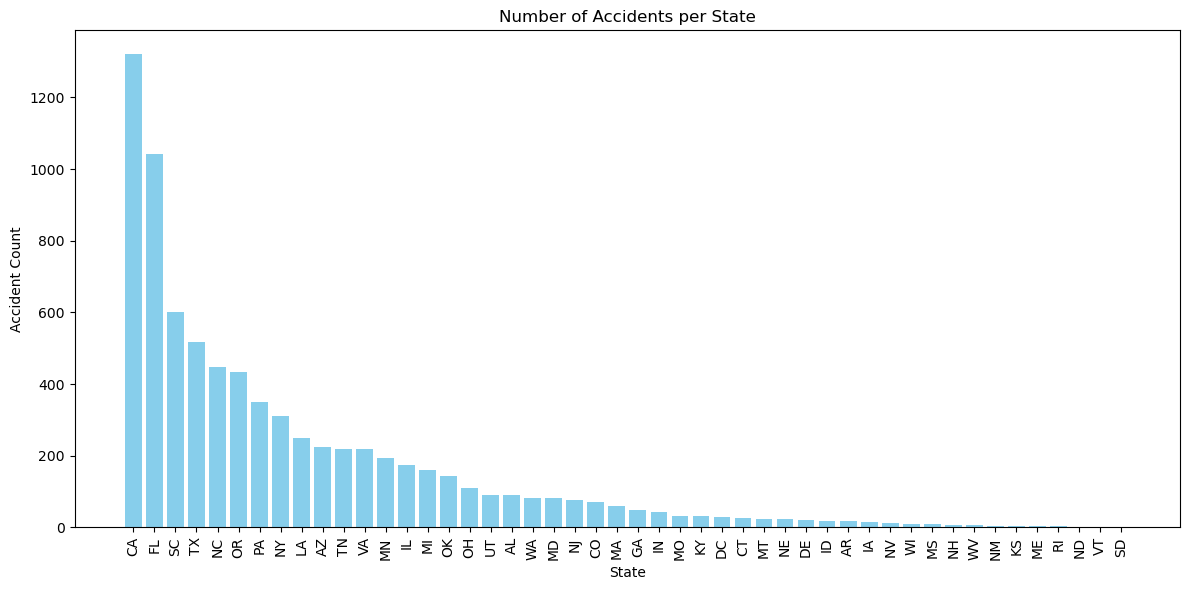

In [49]:
# Sort the data by Accident_Count for better visualization
accidents_per_state = accidents_per_state.sort_values(by='Accident_Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(accidents_per_state['State'], accidents_per_state['Accident_Count'], color='skyblue')
plt.title('Number of Accidents per State')
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.tight_layout()
plt.show()

Most of the major accidents recorded happened in California likely due to the combination of population density, high traffic volume, diverse road conditions, and driver behaviors, motorcycle and bicycles traffic and congestion makes California a hotspot for accidents and the least in San Diego.